In [171]:
import pandas as pd
import numpy as np

!mkdir ../data/preprocessed
!mkdir ../Algorithms

df = pd.read_csv("../data/start-data.csv")

mkdir: ../data/preprocessed: File exists


mkdir: ../Algorithms: File exists


# Data Preprocessing

## Feature Engineering

### Creating New Features From Category Names

In [172]:
cold_item_types = [
                    "Gazlı İçecek",
                    "Ayran & Kefir",
                    "Süt",
                    "Peynir",
                    "Migros Dondurma",
                    "Yoğurt",
                    "Tek Dondurma",
                    "Tereyağ & Margarin",
                    "Kap Dondurma",
                    "Meyve Suyu",
                    "Soğuk Kahve",
                    "Enerji İçeceği",
                    "Tereyağ",
                    "Şalgam"
                    ]

frozen_item_types = [
                    "Beyaz Et",
                    "Kırmızı Et",
                    "Et Şarküteri",
                    "Pizza",
                    "Mantı",
                    "Dondurulmuş Gıda",
                    "Sakatat",
                    "Donuk Fırın",
                    "Dondurulmuş",
                    "Balık",
                    "Buz"
                    ]

scalable_item_types = [
                      "Sebze",
                      "Meyve",
                      "Yeşillik",
                      ]

In [173]:
'''
# This function checks if any item types are present in the given category names.

# Arguments:
#   category_names (str): A comma-separated string containing category names.
#   item_types (iterable): An iterable collection of item types to search for.

# Returns:
#   int: The number of item types found in the category names.
'''
def contains_items(category_names, item_types):
    if isinstance(category_names, str):
        categories = category_names.split(',')
        item_count = 0
        for category in categories:
            if any(item.strip() in item_types for item in category.split(',')):
                item_count += 1
        return item_count
    else:
        return 0

In [174]:
# Apply the function to create the frozen_item column
df['frozen_item'] = df['category_names'].apply(lambda x: contains_items(x, frozen_item_types))
print("Frozen item column added to df")

# Apply the function to create the cold_item column
df['cold_item'] = df['category_names'].apply(lambda x: contains_items(x, cold_item_types))
print("Cold item column added to df")

# Apply the function to create the scalable_item column
df['scalable_item'] = df['category_names'].apply(lambda x: contains_items(x, scalable_item_types))
print("Scalable item column added to df")

Frozen item column added to df
Cold item column added to df
Scalable item column added to df


In [175]:
df

,packet_date,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,cold_item,frozen_item,scalable_item
0,2023-01-30 16:25:56.531971 UTC,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",3,0,6
1,2023-01-13 17:39:56.963085 UTC,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,11
2,2023-12-16 13:39:03.726051 UTC,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,1,1
3,2023-02-11 13:37:56.262404 UTC,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",0,1,2
4,2023-01-04 10:36:28.288366 UTC,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,2,4
...,...,...,...,...,...,...,...,...,...,...,...
1438813,2023-05-14 22:03:55.03007 UTC,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,1,8
1438814,2023-05-02 09:03:42.533162 UTC,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",7,1,0
1438815,2023-02-13 15:23:39.449954 UTC,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,4,2
1438816,2023-03-26 17:25:06.829762 UTC,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8


### Creating New Features From Packet Dates

In [176]:
# Convert the 'packet_date' column to datetime
df['packet_date'] = pd.to_datetime(df['packet_date'], format='%Y-%m-%d %H:%M:%S.%f %Z')

# Extract the month, day of the week, and hour from the 'packet_date' column
df['month'] = df['packet_date'].dt.month
df['day'] = df['packet_date'].dt.dayofweek
df['hour'] = df['packet_date'].dt.hour

print("Columns month, day, and hour added to df")

Columns month, day, and hour added to df


In [177]:
# check if the packet_date column contains holidays
import holidays

tr_holidays = holidays.Turkey()
df['is_holiday'] = df['packet_date'].apply(lambda x: 1 if x in tr_holidays else 0)
print("is_holiday column added to order_date.csv.")
#check how many holiday orders are there in the dataset
df.drop(columns=['packet_date'], inplace=True)
print("Number of holidays in the dataset: ", df['is_holiday'].sum())

is_holiday column added to order_date.csv.
Number of holidays in the dataset:  45145


In [178]:
print("Number of holidays in the dataset: ", df['is_vip'].sum())

Number of holidays in the dataset:  4423


In [179]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,cold_item,frozen_item,scalable_item,month,day,hour,is_holiday
0,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",3,0,6,1,0,16,0
1,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,11,1,4,17,0
2,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",3,1,1,12,5,13,0
3,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",0,1,2,2,5,13,0
4,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",0,2,4,1,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,1,8,5,6,22,0
1438814,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",7,1,0,5,1,9,0
1438815,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,4,2,2,0,15,0
1438816,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8,3,6,17,0


## Data Cleaning

### Removing Outliers

In [180]:
# Get the number of rows before filtering
num_rows_before = df.shape[0]

# Below 1 min collection durations are not possible and above 30 min collection durations are not delivered.
df = df[(df['collection_duration'] > 1) & (df['collection_duration'] < 30)]

# Get the number of rows after filtering
num_rows_after = df.shape[0]

# Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

print("Number of rows removed:", num_rows_removed)

Number of rows removed: 21868


Since the dataset is real life data, we need to remove it sensibly. So we will use the IQR method with multivariate outlier detection. As a Our target and our features.

In [181]:
"""
# This function removes outliers from a DataFrame (`data`) based on the Interquartile Range (IQR) method.

# Args:
#    data (pd.DataFrame): The input DataFrame containing the data.
#    group (list): A list of column names in `data` to be used for grouping. Outlier removal is done
#                  within each unique combination of group values.
#    column (str): The name of the column containing numerical data where outliers will be removed.

# Returns:
#    pd.DataFrame: A new DataFrame with outliers removed based on the IQR method within each group.
"""

def remove_outliers_iqr(data, group, column):
    # Group data by x and calculate IQR and outliers
    groups = data.groupby(group, observed=False)
    filtered_data = []
    
    for _, group_data in groups:
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data within the bounds
        filtered_group_data = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        filtered_data.append(filtered_group_data)

    #Print the number of rows removed

    print("Number of rows removed:", len(data) - pd.concat(filtered_data).shape[0])

    return pd.concat(filtered_data)

# # Usage
df = remove_outliers_iqr(df, [
                              'cold_item', 'frozen_item',
                              'scalable_item', 'item_count',
                              'day','hour','month'
                             ],
                              'collection_duration')
# Randomize df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

Number of rows removed: 36957


In [182]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,cold_item,frozen_item,scalable_item,month,day,hour,is_holiday
0,266508487,80352813,2.321213,3,False,"Kap Dondurma,Gazlı İçecek","PIECE,PIECE,PIECE",2,0,0,5,5,12,0
1,311649392,97773659,7.183333,39,False,"Cips,Soğuk Çay,Tablet Çikolata,Gofret,Bisküvi,...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",4,0,0,9,4,13,0
2,285569400,87787277,3.533333,4,False,"Unlu Mamüller,Konserve & Turşu,Ayran & Kefir","PIECE,PIECE,PIECE,PIECE",1,0,0,7,2,18,0
3,339495238,108097095,4.927150,2,False,Hijyenik Pedler,"PIECE,PIECE",0,0,0,11,5,18,0
4,223022144,62992895,4.450000,9,False,"Ekmek,Gevrekler,Yeşillik,Bakliyat,Yeşillik,Bah...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,3,1,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379988,342486346,109099429,4.466667,3,False,"Puding & Pasta,Baharat","PIECE,PIECE,PIECE",0,0,0,11,4,18,0
1379989,309684016,96976141,5.050558,6,False,"Taze Fırın,Tatlı,Taze Fırın,Taze Fırın,Taze Fırın","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE",0,0,0,9,6,10,0
1379990,346820857,110723670,6.616667,3,False,"Makarna,Makarna","PIECE,PIECE,PIECE",0,0,0,11,6,17,0
1379991,244467472,71477902,4.877085,4,False,"Tereyağ & Margarin,Cips,Kuruyemiş","PIECE,PIECE,PIECE,PIECE",1,0,0,3,4,17,0


### Null and Duplicate Values

In [183]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

# Check if there are any duplicates
num_duplicates = df.duplicated(subset=['order_id', 'package_id']).sum()
print("Number of duplicate rows:", num_duplicates)

Number of null values in each column:
order_id                 0
package_id               0
collection_duration      0
item_count               0
is_vip                   0
category_names         186
units                    0
cold_item                0
frozen_item              0
scalable_item            0
month                    0
day                      0
hour                     0
is_holiday               0
dtype: int64
Number of duplicate rows: 0


In [184]:
# Check if there are any duplicates keep first for order & package id
df.drop_duplicates(subset=['order_id', 'package_id'], keep='first', inplace=True)
# Drop null values
df.dropna(inplace=True)
# Drop the columns that are not needed
df.drop(columns=['package_id','order_id','units'], inplace=True)

In [185]:
df

,collection_duration,item_count,is_vip,category_names,cold_item,frozen_item,scalable_item,month,day,hour,is_holiday
0,2.321213,3,False,"Kap Dondurma,Gazlı İçecek",2,0,0,5,5,12,0
1,7.183333,39,False,"Cips,Soğuk Çay,Tablet Çikolata,Gofret,Bisküvi,...",4,0,0,9,4,13,0
2,3.533333,4,False,"Unlu Mamüller,Konserve & Turşu,Ayran & Kefir",1,0,0,7,2,18,0
3,4.927150,2,False,Hijyenik Pedler,0,0,0,11,5,18,0
4,4.450000,9,False,"Ekmek,Gevrekler,Yeşillik,Bakliyat,Yeşillik,Bah...",0,0,3,1,1,17,0
...,...,...,...,...,...,...,...,...,...,...,...
1379988,4.466667,3,False,"Puding & Pasta,Baharat",0,0,0,11,4,18,0
1379989,5.050558,6,False,"Taze Fırın,Tatlı,Taze Fırın,Taze Fırın,Taze Fırın",0,0,0,9,6,10,0
1379990,6.616667,3,False,"Makarna,Makarna",0,0,0,11,6,17,0
1379991,4.877085,4,False,"Tereyağ & Margarin,Cips,Kuruyemiş",1,0,0,3,4,17,0


# Data Analysis

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

## Boxplot Analysis

In [187]:
#How many rows each "day" column has in the data
print(df['day'].value_counts())

#Plot the mean of the "toplama_süresi" column for each day of the week instead of 0123456 Used Day names
df['day'] = df['day'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day'] = pd.Categorical(df['day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

day
6    232690
5    220410
3    190650
4    186803
1    184720
2    183949
0    180585
Name: count, dtype: int64


In [188]:
'''
# This function creates a boxplot to visualize the distribution of a numerical variable (y)
# across different categories (x) in a DataFrame (data).

# Args:
#     data (pd.DataFrame): The DataFrame containing the data to be visualized.
#     x (str): The name of the column in `data` representing the categorical variable.
#     y (str): The name of the column in `data` containing the numerical variable to be plotted.
#     xlabel (str): The label for the x-axis (categorical variable).
#     tight (bool, optional): A flag to control the layout of the plot. If True, rotates x-axis labels
#                             for better readability and applies tight layout. Defaults to False.

# Returns:
#     Creates a boxplot visualization.
'''

def plot_boxplot( x, y, data, xlabel, tight=False):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, hue=x, showfliers=False)
    plt.xlabel(xlabel)
    plt.ylabel("Collection Time (min)")
    plt.title("Boxplot of Collection Duration by " + xlabel)
    if(tight==True):
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()
    print(df.groupby(x, observed=False)[y].mean())

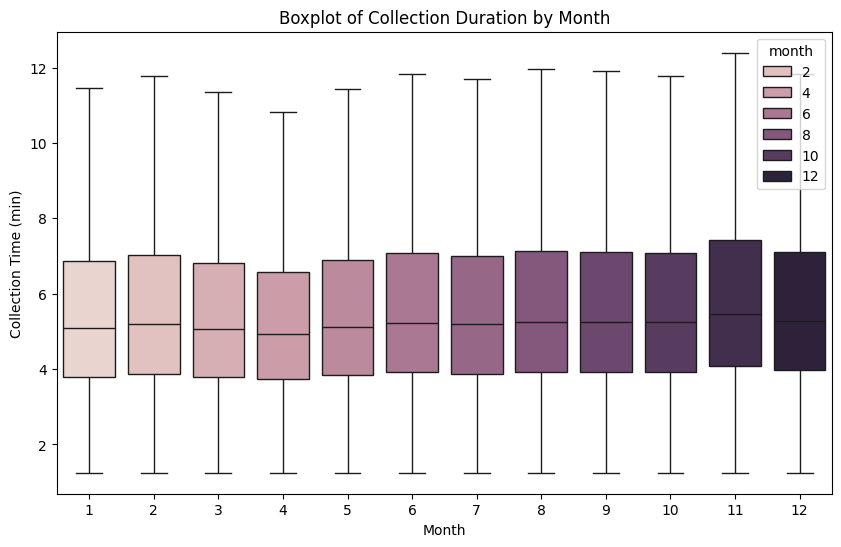

month
1     5.627182
2     5.770470
3     5.610675
4     5.441088
5     5.662541
6     5.800903
7     5.741548
8     5.817400
9     5.816906
10    5.790800
11    6.036455
12    5.855107
Name: collection_duration, dtype: float64


In [189]:
plot_boxplot('month', 'collection_duration', df, 'Month')

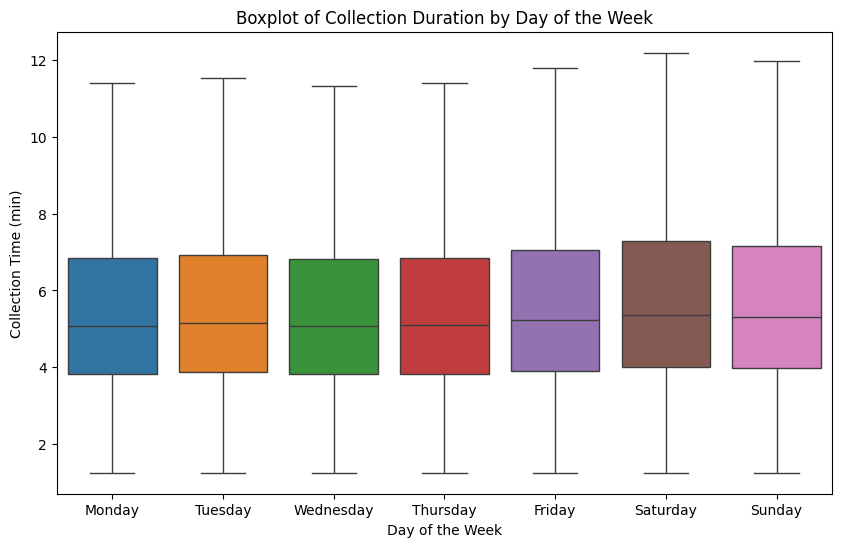

day
Monday       5.634183
Tuesday      5.688188
Wednesday    5.609958
Thursday     5.639258
Friday       5.791751
Saturday     5.940305
Sunday       5.865765
Name: collection_duration, dtype: float64


In [190]:
plot_boxplot('day', 'collection_duration', df, 'Day of the Week')

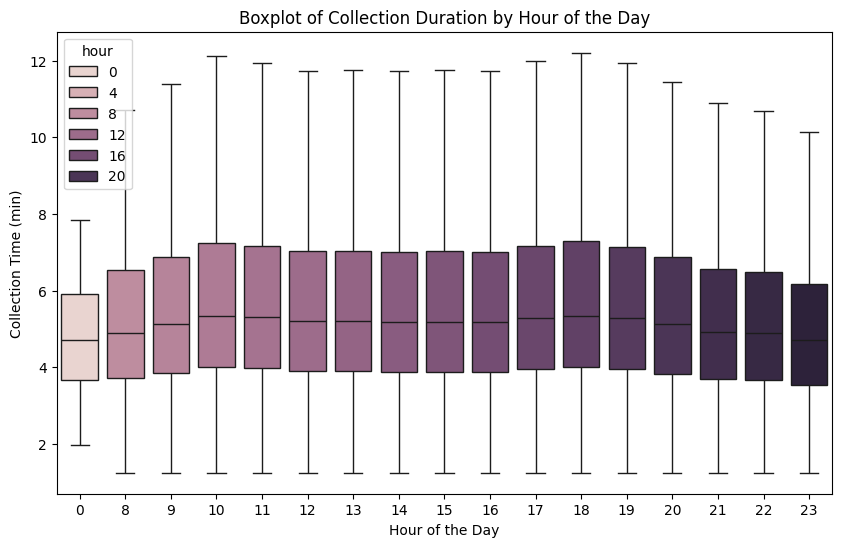

hour
0     5.030673
8     5.428070
9     5.670054
10    5.918921
11    5.868014
12    5.775180
13    5.788830
14    5.766723
15    5.767593
16    5.768576
17    5.854498
18    5.930288
19    5.843001
20    5.647286
21    5.406808
22    5.354173
23    5.122690
Name: collection_duration, dtype: float64


In [191]:
plot_boxplot('hour', 'collection_duration', df, 'Hour of the Day')

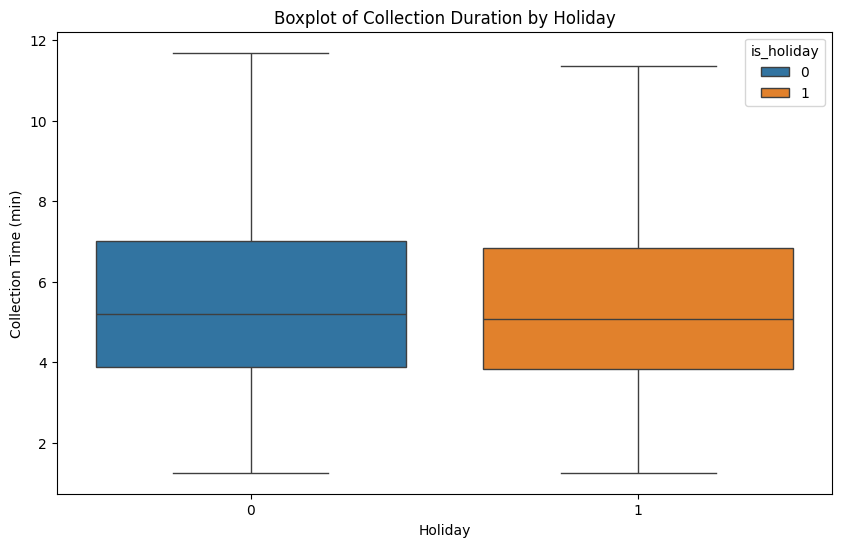

is_holiday
0    5.752158
1    5.613094
Name: collection_duration, dtype: float64


In [192]:
plot_boxplot('is_holiday', 'collection_duration', df, 'Holiday')

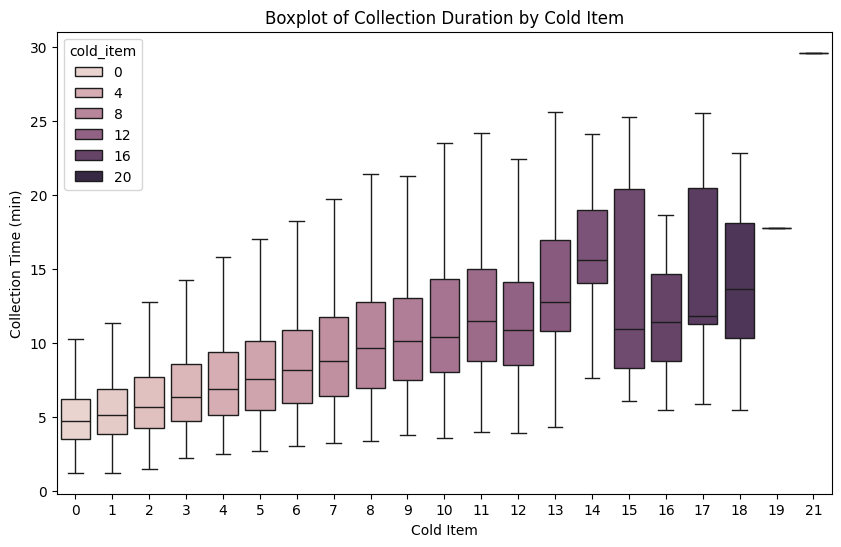

cold_item
0      5.166280
1      5.655427
2      6.283140
3      6.956217
4      7.575112
5      8.163218
6      8.766979
7      9.451590
8     10.282368
9     10.778135
10    11.441800
11    12.551437
12    11.604843
13    13.821591
14    15.951342
15    13.710283
16    11.739071
17    14.925000
18    14.250000
19    17.750000
21    29.616667
Name: collection_duration, dtype: float64


In [193]:
plot_boxplot('cold_item', 'collection_duration', df, 'Cold Item')

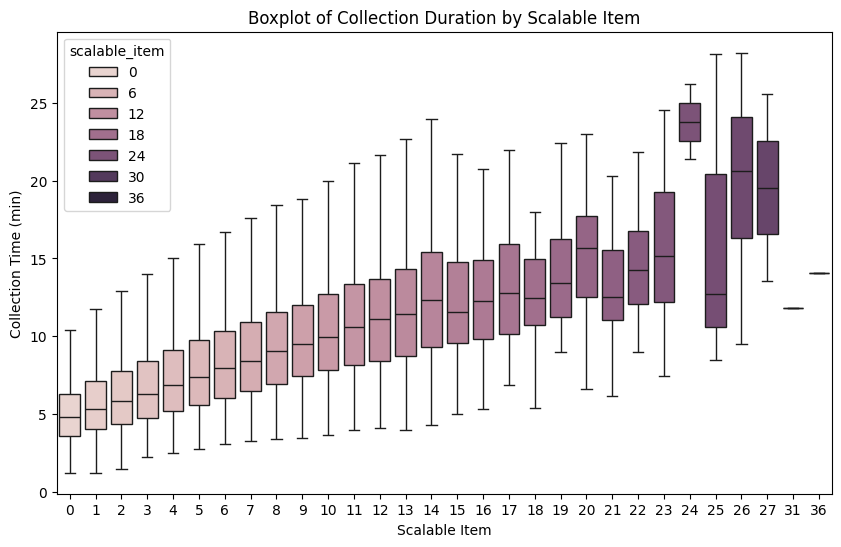

scalable_item
0      5.232689
1      5.857483
2      6.374130
3      6.875020
4      7.407369
5      7.910512
6      8.440629
7      8.921591
8      9.508908
9      9.996256
10    10.473824
11    11.049591
12    11.404253
13    11.946900
14    12.687882
15    12.265895
16    12.633320
17    13.303075
18    13.077734
19    14.122544
20    15.430679
21    13.360814
22    14.870426
23    15.735679
24    23.766667
25    16.444444
26    19.734575
27    19.551013
31    11.800000
36    14.083005
Name: collection_duration, dtype: float64


In [194]:
plot_boxplot('scalable_item', 'collection_duration', df, 'Scalable Item')

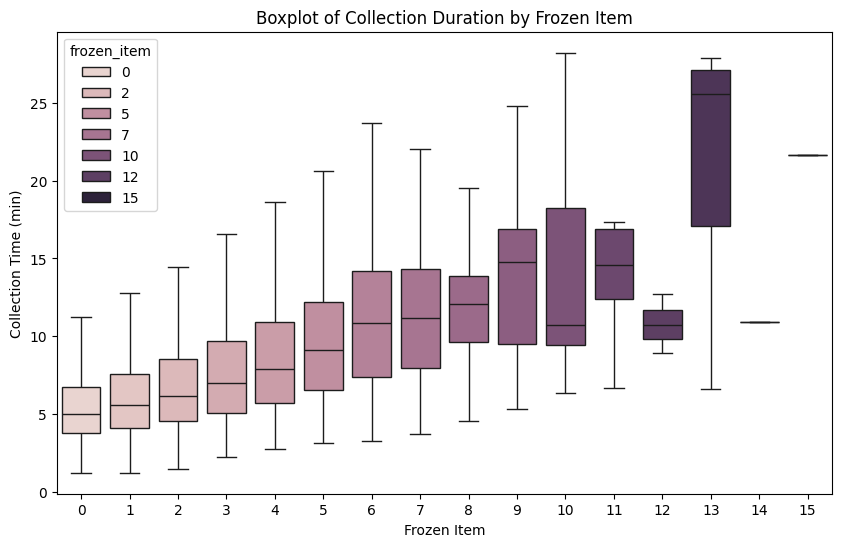

frozen_item
0      5.558051
1      6.167919
2      6.860555
3      7.731458
4      8.653036
5      9.841774
6     11.239174
7     11.737916
8     12.117376
9     13.827843
10    14.563447
11    15.631636
12    10.788889
13    20.849289
14    10.900000
15    21.666667
Name: collection_duration, dtype: float64


In [195]:
plot_boxplot('frozen_item', 'collection_duration', df, 'Frozen Item')

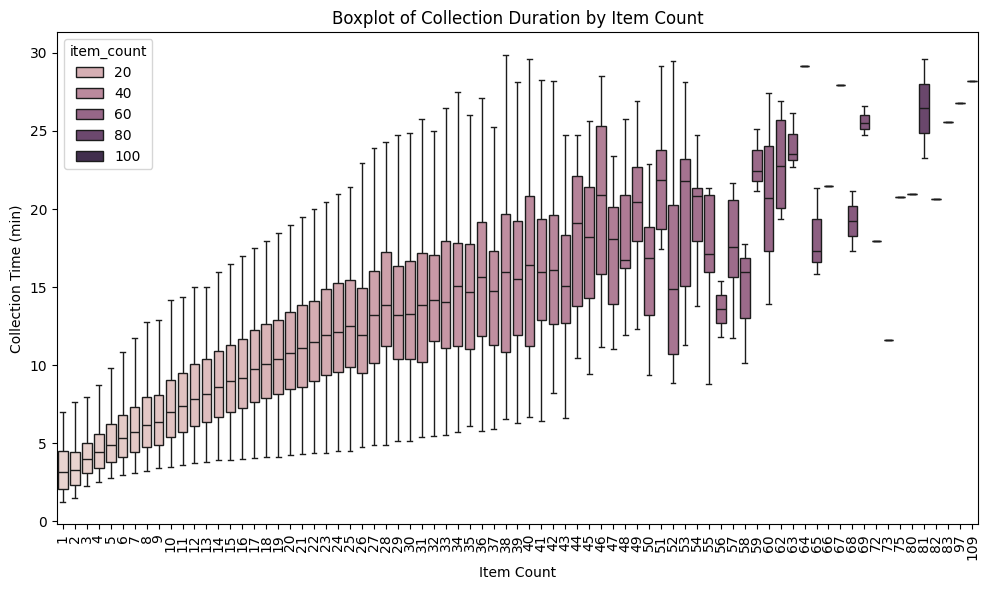

item_count
1       3.326703
2       3.495552
3       4.207287
4       4.626789
5       5.154708
         ...    
81     26.450000
82     20.616667
83     25.583333
97     26.800000
109    28.200000
Name: collection_duration, Length: 77, dtype: float64


In [196]:
plot_boxplot('item_count', 'collection_duration', df, 'Item Count', True)

## Unique Category Analysis

In [197]:
# Initializing an empty set to store unique categories
unique_categories = set()
unique_categories_counts = {}
category_collection_times = {}

'''
# This function processes a single row from a DataFrame and updates dictionaries
# tracking unique category counts and collection times.

# Arguments:
#   row (pandas.Series): A row from a DataFrame containing at least:
#       - 'category_names' (str): Comma-separated string of category names.
#       - 'collection_duration' (float): Collection duration for the item.
#   unique_categories_counts (dict): A dictionary to store counts of unique categories (key: category name, value: count).
#   category_collection_times (dict): A dictionary to store collection times for each category (key: category name, value: list of collection durations).
'''

def process_row(row, unique_categories_counts, category_collection_times):
    if pd.notna(row['category_names']):   
        categories = row['category_names'].split(',')      
        for category in categories:
            category = category.strip()
            unique_categories_counts[category] = unique_categories_counts.get(category, 0) + 1

            if category not in category_collection_times:
                category_collection_times[category] = [row['collection_duration']]
            else:
                category_collection_times[category].append(row['collection_duration'])

In [198]:
# Iterate through each row of the DataFrame
for index, row in df.iterrows():
   process_row(row, unique_categories_counts, category_collection_times)

# Convert the dictionary to a DataFrame
unique_categories_counts_df = pd.DataFrame(list(unique_categories_counts.items()),
                                           columns=['Unique Categories', 'Count'])

# Sort the DataFrame by the count in descending order and give them rankings
unique_categories_counts_df['Rank'] = unique_categories_counts_df['Count'].rank(ascending=False)
unique_categories_counts_df.sort_values(by='Rank', inplace=True)
unique_categories_counts_df = unique_categories_counts_df.drop(columns='Count')

# Calculate the average collection time for each unique category
average_collection_time = {}
for category, times in category_collection_times.items():
    average_collection_time[category] = sum(times) / len(times)


# Add a new column in unique_categories_counts_df to store the average collection time
unique_categories_counts_df['average_collection_time'] = unique_categories_counts_df['Unique Categories'].map(average_collection_time)

In [199]:
unique_categories_counts_df

,Unique Categories,Rank,average_collection_time
24,Sebze,1.0,7.429720
28,Meyve,2.0,7.305102
18,Ekmek,3.0,6.448592
2,Cips,4.0,6.754451
33,Süt,5.0,6.623200
...,...,...,...
187,Soğutma,219.5,7.342891
217,Migros Ev Lezzetleri,221.0,7.605948
213,Baton,222.0,5.530027
222,Yetiştirme Kiti,223.0,8.144544


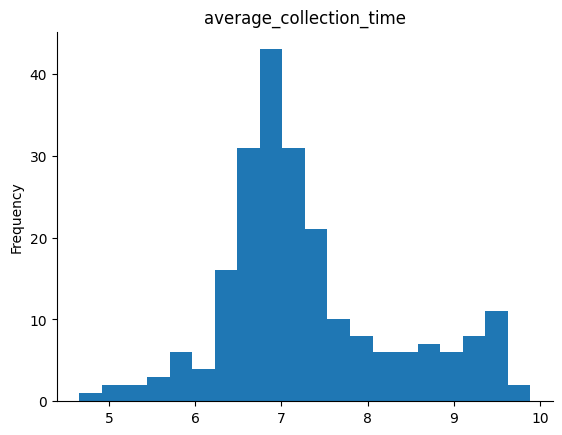

In [200]:
unique_categories_counts_df['average_collection_time'].plot(kind='hist', bins=20, title='average_collection_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [213]:
# Can remove else part didn't use it but can be used for further analysis
def plot_barplot(x, y, data, xlabel, tight=False):
    num_parts = 3
    part_size = len(data) // num_parts

    if tight:
        for i in range(num_parts):
            start_index = i * part_size
            end_index = (i + 1) * part_size if i < num_parts - 1 else len(data)
            part_data = data[start_index:end_index]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=x, y=y, data=part_data, hue=x)
            plt.xlabel(xlabel)
            plt.ylabel("Collection Time (min)")
            plt.title(f"Barplot of Collection Duration by {xlabel} (Part {i+1})")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x, y=y, data=data, hue=x)
        plt.xlabel(xlabel)
        plt.ylabel("Collection Time (min)")
        plt.title("Barplot of Collection Duration by " + xlabel)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


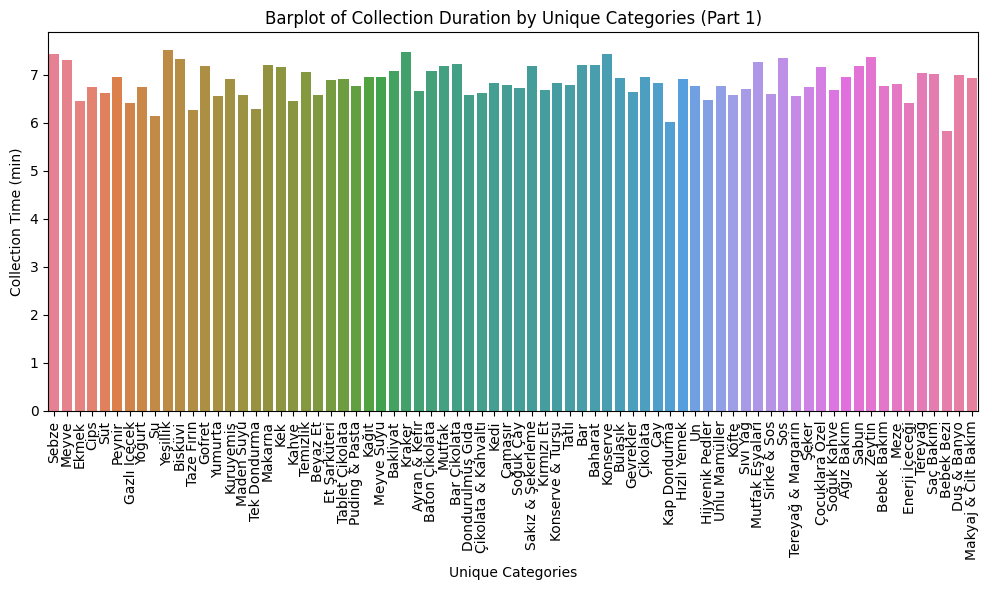

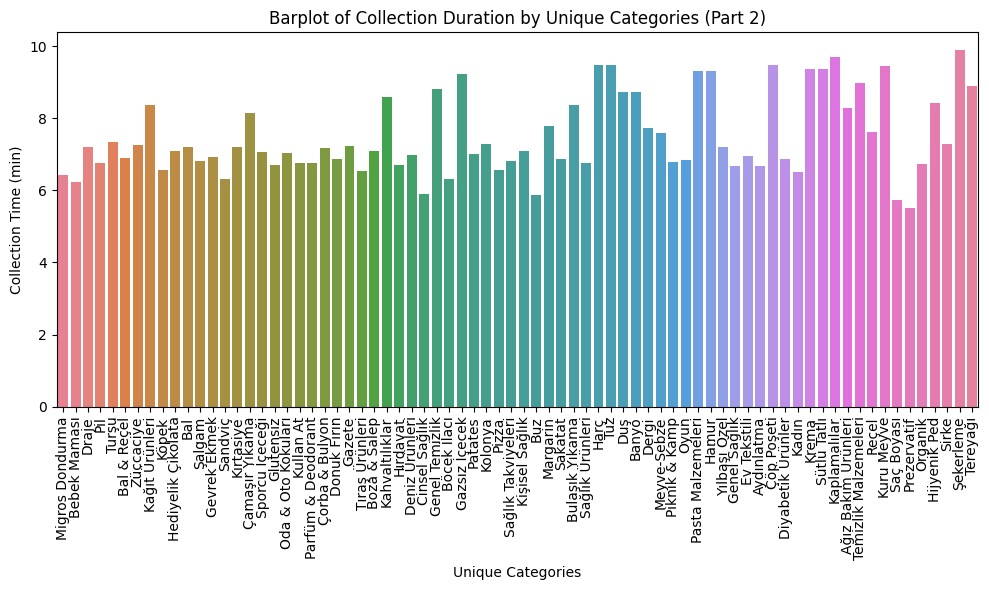

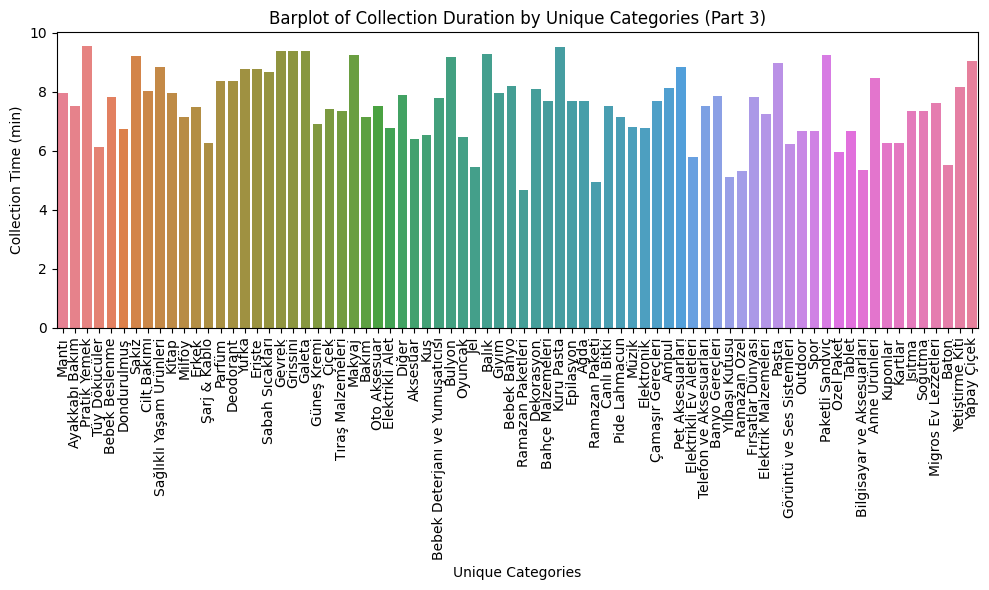

In [214]:
plot_barplot('Unique Categories', 'average_collection_time', unique_categories_counts_df, 'Unique Categories', True)

 Creating new feature with the calculation of average collection duration

In [203]:
# def calculate_metrics(row):
#     category_names = row['category_names']
#     if isinstance(category_names, str):
#         items = category_names.split(",")
#         average_collection_times = []
#         for item in items:
#             avg_time = unique_categories_counts_df.loc[unique_categories_counts_df['Unique Categories'] == item, 'average_collection_time'].values
#             if len(avg_time) > 0:
#                 average_collection_times.append(avg_time[0])

#         if average_collection_times:
#             avg_time = np.mean(average_collection_times)
#             return avg_time
#     return None

# df['average_collection_time'] = df.apply(calculate_metrics, axis=1)

In [215]:
df

,collection_duration,item_count,is_vip,category_names,cold_item,frozen_item,scalable_item,month,day,hour,is_holiday
0,2.321213,3,False,"Kap Dondurma,Gazlı İçecek",2,0,0,5,Saturday,12,0
1,7.183333,39,False,"Cips,Soğuk Çay,Tablet Çikolata,Gofret,Bisküvi,...",4,0,0,9,Friday,13,0
2,3.533333,4,False,"Unlu Mamüller,Konserve & Turşu,Ayran & Kefir",1,0,0,7,Wednesday,18,0
3,4.927150,2,False,Hijyenik Pedler,0,0,0,11,Saturday,18,0
4,4.450000,9,False,"Ekmek,Gevrekler,Yeşillik,Bakliyat,Yeşillik,Bah...",0,0,3,1,Tuesday,17,0
...,...,...,...,...,...,...,...,...,...,...,...
1379988,4.466667,3,False,"Puding & Pasta,Baharat",0,0,0,11,Friday,18,0
1379989,5.050558,6,False,"Taze Fırın,Tatlı,Taze Fırın,Taze Fırın,Taze Fırın",0,0,0,9,Sunday,10,0
1379990,6.616667,3,False,"Makarna,Makarna",0,0,0,11,Sunday,17,0
1379991,4.877085,4,False,"Tereyağ & Margarin,Cips,Kuruyemiş",1,0,0,3,Friday,17,0


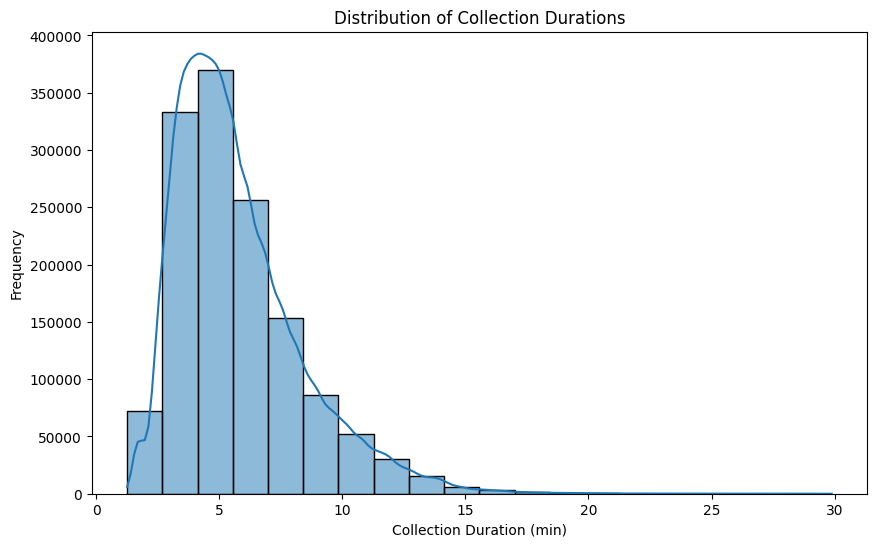

In [218]:
plt.figure(figsize=(10, 6))
sns.histplot(df['collection_duration'], bins=20, kde=True)
plt.title("Distribution of Collection Durations")
plt.xlabel("Collection Duration (min)")
plt.ylabel("Frequency")
plt.show()

# Normalization If Necessary

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# df[['item_count','cold_item','frozen_item','scalable_item']] = scaler.fit_transform(df[['item_count','cold_item','frozen_item','scalable_item']])


# Save the Data

In [ ]:
#order the data according to the paket_tarihi column which is the order date
# df = df.sort_values(by='packet_date')
df.to_csv('../data/preprocessed/main-data.csv', index=False)